In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [98]:
df=pd.read_csv("src/yield_df.csv")
df.head()

,ID,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [99]:
df.drop("ID",axis=1,inplace=True)
df.sample(5)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
26765,Turkey,Soybeans,1999,27500,593,33089.00,20.02
7436,Dominican Republic,Sorghum,2012,14585,1410,6316.61,26.87
10133,Haiti,Sorghum,2010,9161,1440,27.85,27.19
11902,India,Wheat,1997,26789,1083,52279.00,24.71
20208,Mexico,Potatoes,2010,277578,758,63402.29,20.90


In [100]:
df.shape

(28242, 7)

In [101]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [103]:
df.duplicated().sum()

np.int64(2310)

In [104]:
df.drop_duplicates(inplace=True)

In [105]:
df.shape

(25932, 7)

In [106]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [107]:
df["average_rain_fall_mm_per_year"]

0        1485
1        1485
2        1485
3        1485
4        1485
         ... 
28237     657
28238     657
28239     657
28240     657
28241     657
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: int64

In [108]:
def isstr(obj):
    try:
        float(obj)
        return False
    except:
        return True


In [109]:
to_drop=df[df["average_rain_fall_mm_per_year"].apply(isstr)].index

In [110]:
df=df.drop(to_drop)

In [111]:
df.shape

(25932, 7)

C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_28072\4113712605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Area'],palette='Set2')


<Axes: xlabel='count', ylabel='Area'>

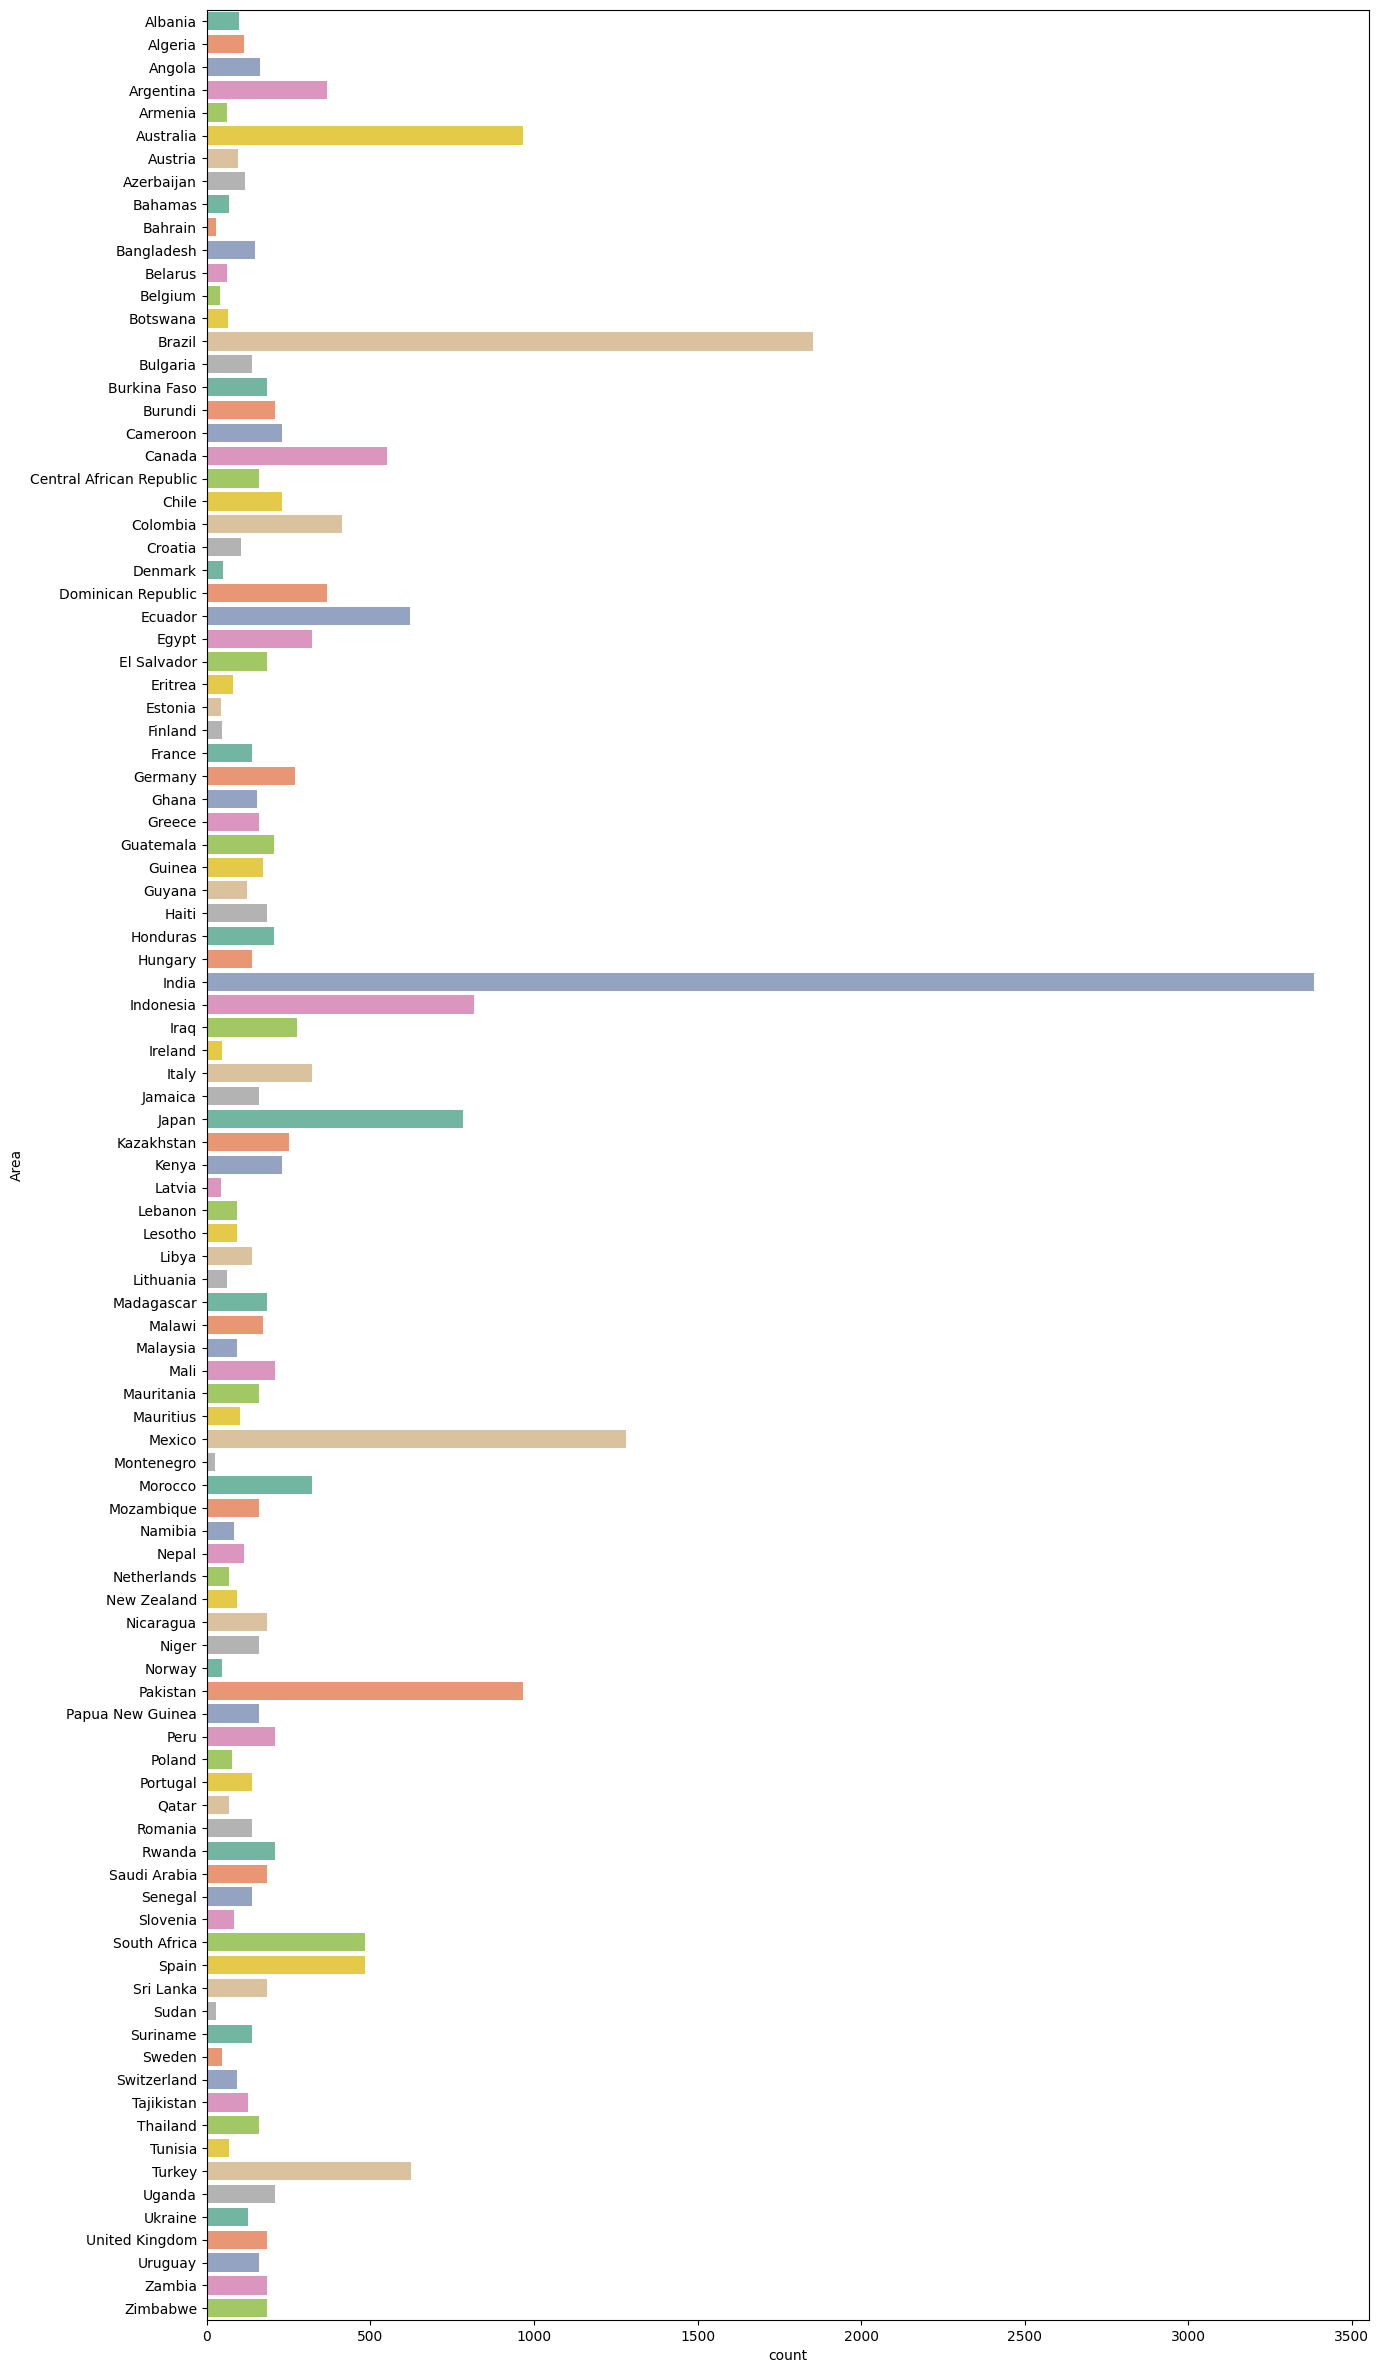

In [112]:
plt.figure(figsize=(15,30))
sns.countplot(y=df['Area'],palette='Set2')

In [113]:
df['average_rain_fall_mm_per_year']=df['average_rain_fall_mm_per_year'].astype(np.float64)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [115]:
country= df['Area'].unique()

In [116]:
yield_per_country=[]
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())


In [117]:
yield_per_country

[np.int64(5711536),
 np.int64(6711464),
 np.int64(5722563),
 np.int64(32864032),
 np.int64(4524100),
 np.int64(109111062),
 np.int64(10852258),
 np.int64(4608380),
 np.int64(4384717),
 np.int64(4443889),
 np.int64(7720159),
 np.int64(4704812),
 np.int64(8442270),
 np.int64(470651),
 np.int64(136340329),
 np.int64(6263075),
 np.int64(6083337),
 np.int64(7031146),
 np.int64(10717883),
 np.int64(34706922),
 np.int64(4255627),
 np.int64(20561214),
 np.int64(26927138),
 np.int64(6083167),
 np.int64(10701651),
 np.int64(25312166),
 np.int64(21315591),
 np.int64(36828848),
 np.int64(16855944),
 np.int64(1452416),
 np.int64(3595638),
 np.int64(6210668),
 np.int64(15790618),
 np.int64(38780463),
 np.int64(9260371),
 np.int64(14571925),
 np.int64(16508723),
 np.int64(7975743),
 np.int64(8361103),
 np.int64(8619194),
 np.int64(10920131),
 np.int64(8824110),
 np.int64(274219558),
 np.int64(68067328),
 np.int64(10984722),
 np.int64(9104030),
 np.int64(32280700),
 np.int64(19698007),
 np.int64(10092

C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_28072\128103907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country,x=yield_per_country,palette='Set2')


<Axes: >

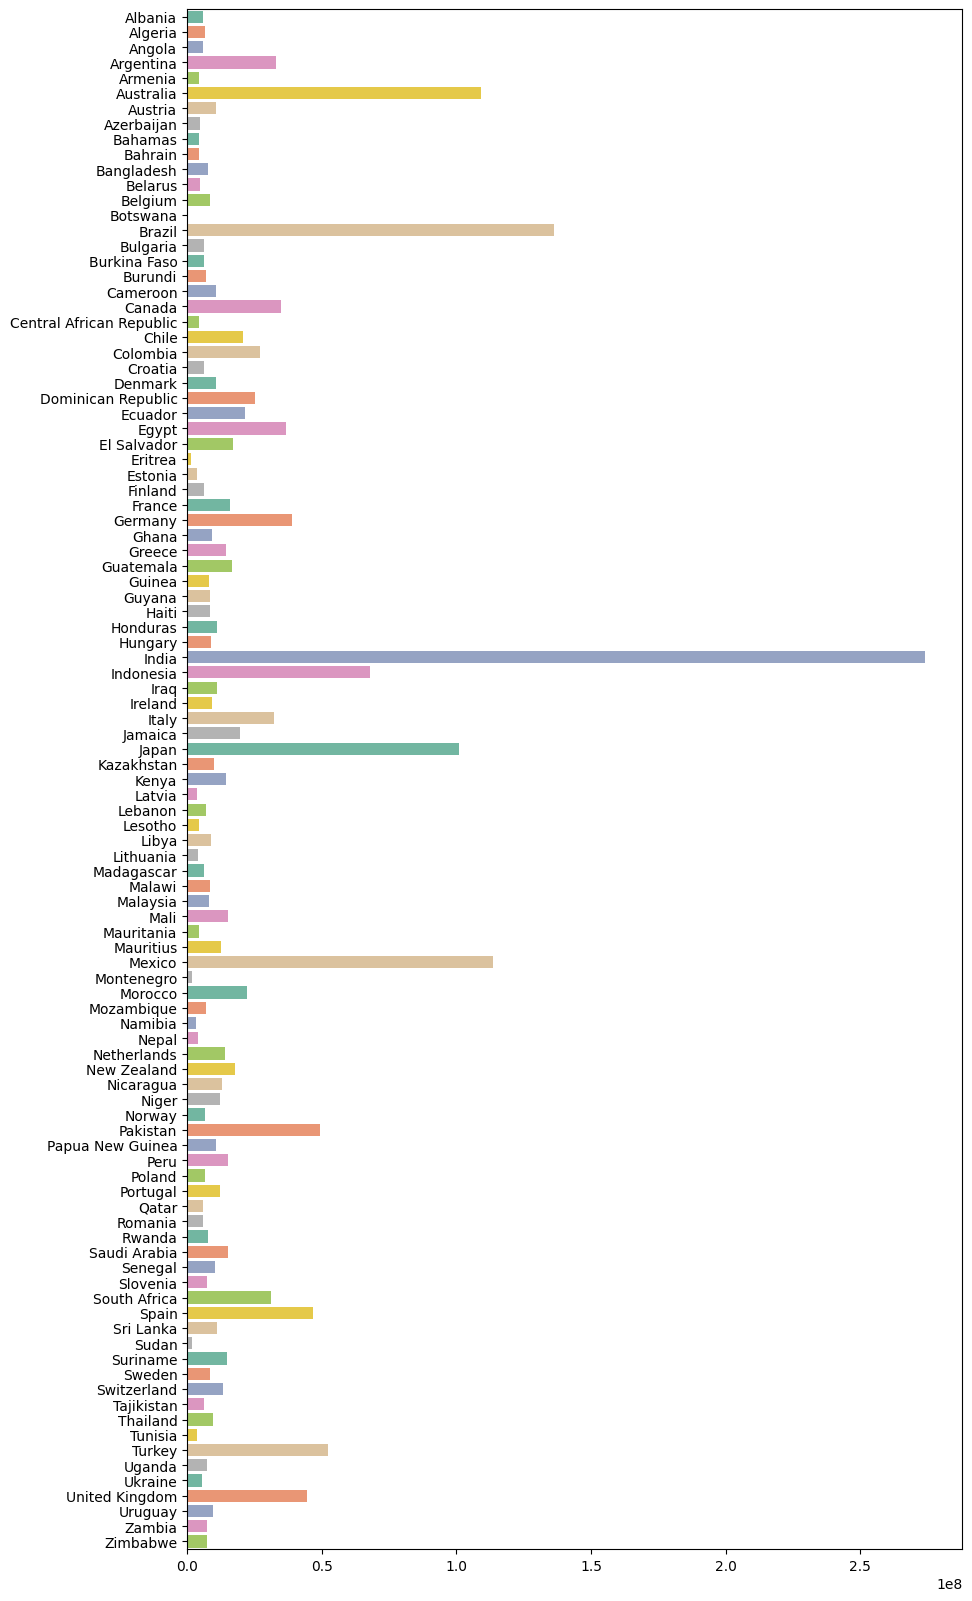

In [118]:
plt.figure(figsize=(10,20))
sns.barplot(y=country,x=yield_per_country,palette='Set2')


In [119]:
crops=df['Item'].unique()
crops

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [120]:
yield_per_item=[]
for crop in crops:
    yield_per_item.append(df[df['Item']==crop]['hg/ha_yield'].sum())

In [121]:
yield_per_item

[np.int64(142020761),
 np.int64(785921609),
 np.int64(127646024),
 np.int64(52906376),
 np.int64(49957039),
 np.int64(106614786),
 np.int64(275132269),
 np.int64(310269345),
 np.int64(58958974),
 np.int64(86769760)]

C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_28072\429339282.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yield_per_item,y=crops,palette='Set1')


<Axes: >

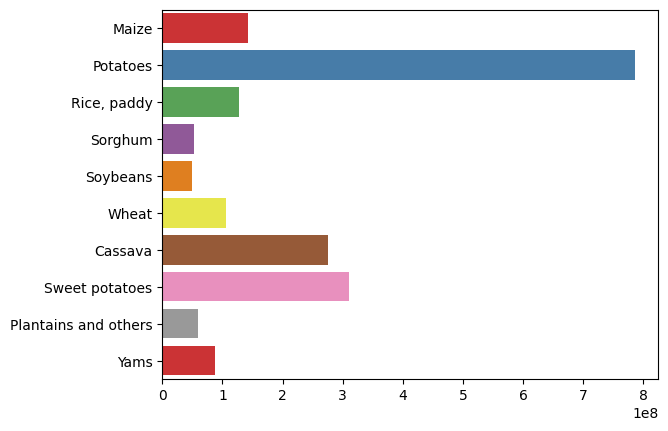

In [122]:
sns.barplot(x=yield_per_item,y=crops,palette='Set1')

In [123]:
col=['Year','Area','average_rain_fall_mm_per_year','avg_temp','pesticides_tonnes','Item','hg/ha_yield']
df=df[col]

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('hg/ha_yield',axis=1),df['hg/ha_yield'],test_size=0.2,random_state=42)


In [125]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer


In [126]:
ohe=OneHotEncoder(drop='first')
scaler=StandardScaler()


In [127]:
x_train.head(1)

,Year,Area,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes,Item
24234,2000,Saudi Arabia,59.0,26.55,3024.11,Sorghum


In [128]:
preprocessor=ColumnTransformer(
    transformers=[
        ('OneHotEncoder',ohe,[1,5]),
        ('standardisation',scaler,[0,2,3,4])
    ],
    remainder='passthrough'              
)

In [129]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('standardisation', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [130]:
x_train_trained = preprocessor.fit_transform(x_train)
x_test_trained = preprocessor.fit_transform(x_test)


In [131]:
x_train_trained

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122877 stored elements and shape (20745, 113)>

In [132]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score


In [133]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'knr':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()
}
for name , mod in models.items():
    mod.fit(x_train_trained,y_train)
    y_pred=mod.predict(x_test_trained)

    print(f"{name} MSE : {mean_squared_error(y_test,y_pred)} and Score : {r2_score(y_test,y_pred)}")


lr MSE : 1821770086.2342808 and Score : 0.748648251500512


C:\Users\PIYUSH\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.317e+10, tolerance: 1.482e+10
  model = cd_fast.sparse_enet_coordinate_descent(


lss MSE : 1822352595.2220414 and Score : 0.748567882054501
rg MSE : 1822660218.2906482 and Score : 0.748525438940105
knr MSE : 124881646.97772121 and Score : 0.9827699331762387
dtr MSE : 469134750.9907461 and Score : 0.9352729299737598


SELECT MODEL : 


In [134]:
dtr=DecisionTreeRegressor()

In [135]:
dtr.fit(x_train_trained,y_train)
dtr.predict(x_test_trained)


array([ 34473.,  15838.,  72614., ...,  52692.,   9621., 279000.],
      shape=(5187,))

PREDICTIVE SYSYTEM : 

In [136]:
def prediction(Year,Area,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes,Item):
    features = np.array([[Year,Area,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes,Item]])

    transformed_features = preprocessor.transform(features)

    pred_value = dtr.predict(transformed_features).reshape(1,-1)
    return pred_value[0]



In [137]:
x_train

,Year,Area,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes,Item
24234,2000,Saudi Arabia,59.0,26.55,3024.11,Sorghum
9468,2012,Greece,652.0,18.82,8002.20,Sweet potatoes
6793,2006,Colombia,3240.0,27.51,98328.63,Maize
28212,2010,Zimbabwe,657.0,21.17,3305.17,Potatoes
7358,2007,Dominican Republic,1410.0,27.08,5689.80,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,Portugal,854.0,16.31,16942.00,Sweet potatoes
5960,2006,Canada,537.0,7.85,36572.75,Wheat
860,1991,Australia,534.0,18.73,17866.00,Potatoes
17223,1998,Kazakhstan,250.0,6.94,6416.14,Potatoes


In [138]:
Year=2010
Area='Saudi Arabia'
average_rain_fall_mm_per_year=70
avg_temp=28
pesticides_tonnes=3500	
Item='Potatoes'
result = prediction(Year,Area,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes,Item)

C:\Users\PIYUSH\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\PIYUSH\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [139]:
result

array([260575.])

PICKLE : 

In [141]:
import pickle
pickle.dump(dtr,open('src/trained_crop_model/dtr.pkl','wb'))
pickle.dump(preprocessor,open('src/trained_crop_model/preprocessor.pkl','wb'))

In [142]:
import sklearn
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)

1.7.2
2.3.3
2.3.3


In [143]:
df

,Year,Area,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes,Item,hg/ha_yield
0,1990,Albania,1485.0,16.37,121.00,Maize,36613
1,1990,Albania,1485.0,16.37,121.00,Potatoes,66667
2,1990,Albania,1485.0,16.37,121.00,"Rice, paddy",23333
3,1990,Albania,1485.0,16.37,121.00,Sorghum,12500
4,1990,Albania,1485.0,16.37,121.00,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,Zimbabwe,657.0,19.76,2550.07,"Rice, paddy",22581
28238,2013,Zimbabwe,657.0,19.76,2550.07,Sorghum,3066
28239,2013,Zimbabwe,657.0,19.76,2550.07,Soybeans,13142
28240,2013,Zimbabwe,657.0,19.76,2550.07,Sweet potatoes,22222


In [144]:
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)

1.7.2
2.3.3
2.3.3
